Assignment 6 - Regression Models, model fit and prediction errors

Tyler Gardner

9/30/2021

# Task 1

## Code Chunk 1 - Set up, data import, data exploration

In the Code Chunk 1 all the necessary packages needed for the assignment are added, the google drive is mounted to import and read in the data using the pd.read_csv. The overall structure and summary of the input datam is shown and explored using the info(), describe(), head() and other commands similar commands. The last part of this code chunk includes the column that is needed to be removed which is the 'Name' column in the dataset. 

In [119]:
# A.
# Import packages needed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import numpy as np

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error

In [120]:
# mount the google drive location so we can read the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
# Import data using pd.read_csv()
NA_sales_filtered_raw = pd.read_csv("/content/drive/MyDrive/data_sets/NA_sales_filtered.csv",encoding = "ISO-8859-1")
NA_sales_filtered = NA_sales_filtered_raw.copy()

# raw is the original unedited version of our data which can be useful for inspecting changes we've made 
# compared to the original unedited data

In [122]:
# B.
# Show the overall structure and summary of the input data using info(), describe(), head(), etc.
NA_sales_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6345 non-null   object 
 1   Platform      6345 non-null   object 
 2   Genre         6345 non-null   object 
 3   Rating        6345 non-null   object 
 4   Critic_Score  6345 non-null   int64  
 5   Critic_Count  6345 non-null   int64  
 6   User_Score    6345 non-null   int64  
 7   User_Count    6345 non-null   int64  
 8   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 446.3+ KB


In [123]:
NA_sales_filtered.describe()

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
count,6345.000000,6345.000000,6345.000000,6345.000000,6345.000000
mean,69.819385,28.966745,70.765485,152.730969,0.354230
std,13.945811,19.098594,14.438432,545.962483,0.494404
min,13.000000,3.000000,5.000000,4.000000,0.010000
25%,61.000000,14.000000,64.000000,10.000000,0.080000
50%,72.000000,25.000000,74.000000,24.000000,0.170000
75%,80.000000,40.000000,81.000000,77.000000,0.410000
max,98.000000,113.000000,95.000000,10665.000000,3.490000


In [124]:
NA_sales_filtered.head()

,Name,Platform,Genre,Rating,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
0,Final Fantasy VII,PS,Role-Playing,T,92,20,91,1282,3.01
1,Final Fantasy X,PS2,Role-Playing,T,92,53,86,1056,2.91
2,The Sims 3,PC,Simulation,T,86,75,75,886,0.99
3,Final Fantasy VIII,PS,Role-Playing,T,90,24,85,644,2.28
4,Tekken 3,PS,Fighting,T,96,15,90,367,3.27


In [125]:
NA_sales_filtered.shape

(6345, 9)

In [126]:
NA_sales_filtered.isnull().sum()

Name            0
Platform        0
Genre           0
Rating          0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
NA_Sales        0
dtype: int64

In [127]:
# C. Remove one column before modeling
NA_sales_filtered = NA_sales_filtered[['Platform', 'Genre', 'Rating', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'NA_Sales']]
NA_sales_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      6345 non-null   object 
 1   Genre         6345 non-null   object 
 2   Rating        6345 non-null   object 
 3   Critic_Score  6345 non-null   int64  
 4   Critic_Count  6345 non-null   int64  
 5   User_Score    6345 non-null   int64  
 6   User_Count    6345 non-null   int64  
 7   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 396.7+ KB


C. Remove the column that should be removed and in a text block explain your reasoning for dropping the table.

The 'Name' column was the column that needed to be removed before modeling. The reason it needed to be removed was because in the name column there was more than a few categories within the column itself. With how many different Names there are in the name column, it is not good for modeling and evauluating/testing the data.

# Task 2

## Code Chunk 2 - Seaborn Pairplot, Correlation Variable, Heatmap

In Code Chunk 2, a seaborn pairplot is used to plot the data. A variable is then created for correlations in the dataframe and using the correlation variable a seaborn heatmap is produced. After all that code a text box is then used to evaluate the strongest positive correlations, strongest negative correlations, and the least correlation from the output of the heatmap.

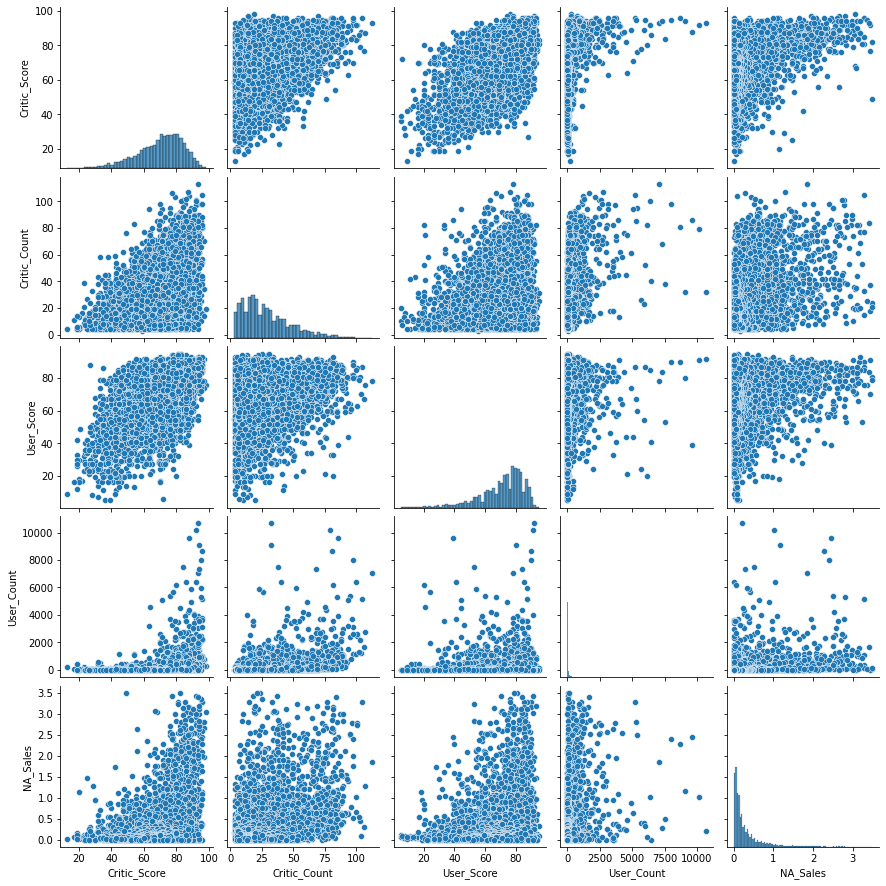

In [128]:
# B. Use seaborn pairplot to plot your data.
# Create a seaborn pairplot
sns.pairplot(NA_sales_filtered)

In [129]:
# C. Create a variable for correlations in the dataframe.
# Compute Correlation
cor = NA_sales_filtered.corr()

[]

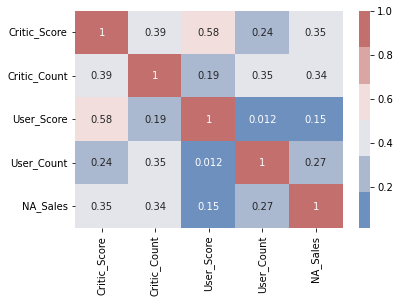

In [130]:
# C. Using the correlation variable create a seaborn heatmap.
sns.heatmap(cor, 
            annot=True,
            cmap=sns.color_palette("vlag"), 
        xticklabels=cor.columns,
        yticklabels=cor.columns)

plt.plot()

D. In a text block below the heatmap tell which two colums had the strongest positive correlations, the strongest negative correlation and the least correlation.

Strongest Positive Correlation: Critic_Score and User_Score

Strongest Negative Correlation: There is no negative correlation in this dataset. 

Least Correlation: Critic_Count and Critic_Score

# Task 3

## Code Chunk 3 - Simple Hold-Out evaluation and Histograms

In Code Chunk 3, The dataset is partitioned for simple hold-out evaluation. 70% for training, 30% of the data for testing. After encoding the data set and doing the train_test_split of the dataset, the overall summaries of the training and test sets are shown. Both the describe() and info() commands are produced for the train and test overall summaries. Lastly, a histogram of the y variable in both the test and train datasets are shown below.

In [131]:
# D. 
# Partition the dataset for simple hold-out evaluation
# 70% for training, 30% for testing

# Encode the Dataset
NA_sales_filtered_ENC = pd.get_dummies(NA_sales_filtered)

In [132]:
# Train, test, Split of the dataset
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(NA_sales_filtered_ENC,
                                                    NA_sales_filtered_ENC['NA_Sales'],
                                                    test_size=.3,
                                                    random_state=random_state)

In [133]:
# E. 
# Show the overall summaries of training and testing sets with describe() and info()

# Train overall summaries
X_train.describe()

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_T,Rating_missing
count,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.00000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000
mean,69.874578,29.113713,70.790137,148.383247,0.356093,0.022968,0.073857,0.038505,0.057420,0.049088,0.023643,0.178113,0.118892,0.033326,0.055618,0.011709,0.075433,0.012159,0.133303,0.092322,0.023643,0.238685,0.036028,0.059221,0.060347,0.063724,0.017564,0.084891,0.102454,0.12317,0.038955,0.142535,0.032425,0.311867,0.140959,0.204684,0.338888,0.003603
std,14.013822,19.129240,14.412929,517.265687,0.499680,0.149818,0.261568,0.192433,0.232669,0.216076,0.151952,0.382651,0.323698,0.179506,0.229209,0.107585,0.264119,0.109610,0.339941,0.289512,0.151952,0.426328,0.186381,0.236064,0.238155,0.244289,0.131374,0.278750,0.303279,0.32867,0.193510,0.349638,0.177146,0.463308,0.348019,0.403516,0.473385,0.059922
min,13.000000,3.000000,7.000000,4.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,14.000000,64.000000,10.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,25.000000,74.000000,25.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,40.000000,81.000000,80.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,98.000000,107.000000,95.000000,10665.000000,3.490000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4441 entries, 334 to 860
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Critic_Score        4441 non-null   int64  
 1   Critic_Count        4441 non-null   int64  
 2   User_Score          4441 non-null   int64  
 3   User_Count          4441 non-null   int64  
 4   NA_Sales            4441 non-null   float64
 5   Platform_3DS        4441 non-null   uint8  
 6   Platform_DS         4441 non-null   uint8  
 7   Platform_GBA        4441 non-null   uint8  
 8   Platform_GC         4441 non-null   uint8  
 9   Platform_PC         4441 non-null   uint8  
 10  Platform_PS         4441 non-null   uint8  
 11  Platform_PS2        4441 non-null   uint8  
 12  Platform_PS3        4441 non-null   uint8  
 13  Platform_PS4        4441 non-null   uint8  
 14  Platform_PSP        4441 non-null   uint8  
 15  Platform_PSV        4441 non-null   uint8  
 16  Platf

In [135]:
# Test overall summaries
X_test.describe()

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_T,Rating_missing
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,69.690651,28.623950,70.707983,162.871849,0.349884,0.020483,0.067752,0.035189,0.051471,0.045168,0.023634,0.180672,0.116071,0.032563,0.069328,0.019433,0.073529,0.014181,0.134454,0.088235,0.027836,0.256828,0.028887,0.050945,0.058298,0.054097,0.018382,0.084034,0.098739,0.131828,0.040966,0.151261,0.025735,0.306197,0.131828,0.202731,0.355567,0.003676
std,13.788676,19.027523,14.501375,607.677725,0.481975,0.141683,0.251386,0.184306,0.221014,0.207727,0.151947,0.384847,0.320395,0.177537,0.254077,0.138077,0.261072,0.118266,0.341229,0.283711,0.164546,0.436998,0.167532,0.219944,0.234368,0.226268,0.134365,0.277511,0.298390,0.338392,0.198264,0.358397,0.158386,0.461034,0.338392,0.402139,0.478811,0.060538
min,19.000000,4.000000,5.000000,4.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,14.000000,63.000000,10.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.000000,24.000000,74.000000,24.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,39.000000,81.000000,72.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,96.000000,113.000000,95.000000,9073.000000,3.430000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904 entries, 730 to 3555
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Critic_Score        1904 non-null   int64  
 1   Critic_Count        1904 non-null   int64  
 2   User_Score          1904 non-null   int64  
 3   User_Count          1904 non-null   int64  
 4   NA_Sales            1904 non-null   float64
 5   Platform_3DS        1904 non-null   uint8  
 6   Platform_DS         1904 non-null   uint8  
 7   Platform_GBA        1904 non-null   uint8  
 8   Platform_GC         1904 non-null   uint8  
 9   Platform_PC         1904 non-null   uint8  
 10  Platform_PS         1904 non-null   uint8  
 11  Platform_PS2        1904 non-null   uint8  
 12  Platform_PS3        1904 non-null   uint8  
 13  Platform_PS4        1904 non-null   uint8  
 14  Platform_PSP        1904 non-null   uint8  
 15  Platform_PSV        1904 non-null   uint8  
 16  Plat

[]

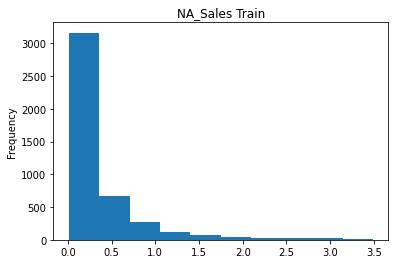

In [137]:
# C. 
# Show a histogram of the y variable in both the test and train

# Histogram of y variable in train
X_train.NA_Sales.plot.hist(title="NA_Sales Train")
plt.plot()

[]

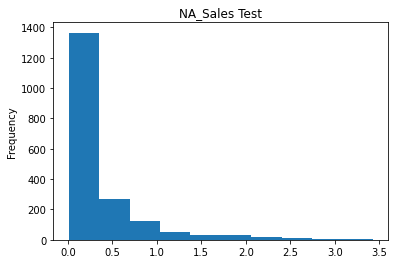

In [138]:
# Histogram of y variable in test
X_test.NA_Sales.plot.hist(title="NA_Sales Test")
plt.plot()

# Task 4

## Code Chunk 4 - Model Training

In code chunk 4 we create two models using LinearRegression() and DecisionTreeRegressor() on the training set using the default settings throughout the assignment. For each model that is trained, the information is shown about the model by model name and the model is fitted and generates the model-fit(R2) along with the prediciton error metrics (MAE, MSE) in both the training and test sets. 

In [139]:
# A.
# Train two models using LinearRegression() and DecisionTreeRegressor() on the training set. 
# Use the default settings of these methods throughout this assignment
# B.
# For each of the models trained, perform the following:
# i.) Show information about the model by specifying the model name
# ii.)Fit the model and generate the model fit R2, MAE and MSE

X_train, X_test, y_train, y_test = train_test_split(NA_sales_filtered_ENC.drop('NA_Sales',axis=1),
                                                    NA_sales_filtered_ENC['NA_Sales'],
                                                    test_size=.3,
                                                    random_state=random_state)

### Linear Regression Model

#### Training Dataset

In [140]:
# Linear Regression Model
# Fit the Linear Regression Model for train set
Linear_Regression_Model = LinearRegression().fit(X_train, y_train)

In [141]:
# Predict on the X_Train data 
y_pred = Linear_Regression_Model.predict(X_train)

In [142]:
# Extra credit MAPE function to print MAPE metric in next block
def mape(y_train, y_pred): 
    y_train, y_pred = np.array(y_train), np.array(y_pred)
    return np.mean(np.abs((y_train - y_pred) / y_train)) * 100

In [143]:
# Display of regression metric results on Training Data

print("MAE:",sklearn.metrics.mean_absolute_error(y_train, y_pred))
print("MSE:",sklearn.metrics.mean_squared_error(y_train, y_pred))
print("R2:",sklearn.metrics.r2_score(y_train, y_pred))

# Extra Credit Outputs MAPE, RMSE, MSLE
print("RMSE:",sklearn.metrics.mean_squared_error(y_train, y_pred, squared=False))
print('MAPE:',mape(y_train,y_pred))
# Couldn't figure out MSLE for the Extra credit below is what I got
#print("MSLE:",sklearn.metrics.mean_squared_log_error(y_train, y_pred,sample_weight=None, multioutput='uniform_average'))

MAE: 0.2694569808176764
MSE: 0.178791026272596
R2: 0.2837577203948686
RMSE: 0.4228368790356347
MAPE: 255.8369472298387


#### Testing Dataset

In [144]:
# Predict ont the X_test data
y_pred_test = Linear_Regression_Model.predict(X_test)

In [145]:
# Extra credit MAPE function to print MAPE metric in next block
def mape(y_test, y_pred_test): 
    y_test, y_pred_test = np.array(y_test), np.array(y_pred_test)
    return np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

In [146]:
# Display of regression metric results on Testing Data
print("MAE:",sklearn.metrics.mean_absolute_error(y_test, y_pred_test))
print("MSE:",sklearn.metrics.mean_squared_error(y_test, y_pred_test))
print("R2:",sklearn.metrics.r2_score(y_test, y_pred_test))

# Extra Credit outputs MAPE, RMSE
print("RMSE:",sklearn.metrics.mean_squared_error(y_test, y_pred_test, squared=False))
print('MAPE:',mape(y_test,y_pred_test))

MAE: 0.26730180426784816
MSE: 0.1725062816606495
R2: 0.2570096085557565
RMSE: 0.4153387553078204
MAPE: 256.20544789865534


### Decision Tree Regressor Model

#### Training Dataset

In [147]:
Decision_Tree_Regressor_Model = DecisionTreeRegressor()

In [148]:
# Fit the Decision Tree Regressor Model for the train set
Decision_Tree_Regressor_Model = Decision_Tree_Regressor_Model.fit(X_train, y_train)

In [149]:
# Predict using the Decision Tree Regressor Model for the Train Set
y_tree_pred = Decision_Tree_Regressor_Model.predict(X_train)

In [150]:
# Extra credit MAPE function to print MAPE metric in next block
def mape(y_train, y_tree_pred): 
    y_train, y_tree_pred = np.array(y_train), np.array(y_tree_pred)
    return np.mean(np.abs((y_train - y_tree_pred) / y_train)) * 100

In [151]:
#Display the Decision Tree Regressor metric results for the train set
print("MAE:",sklearn.metrics.mean_absolute_error(y_train, y_tree_pred))
print("MSE:",sklearn.metrics.mean_squared_error(y_train, y_tree_pred))
print("R2:",sklearn.metrics.r2_score(y_train, y_tree_pred))

# Extra Credit outputs MAPE, RMSE
print("RMSE:",sklearn.metrics.mean_squared_error(y_train, y_tree_pred, squared=False))
print('MAPE:',mape(y_train,y_tree_pred))

MAE: 0.00028822337311416353
MSE: 0.00010745327628912406
R2: 0.9995695389127471
RMSE: 0.010365967214356992
MAPE: 0.1906147627314395


#### Testing Dataset

In [152]:
# Predict using the DTR Test Model for the test set
y_tree_pred_test = Decision_Tree_Regressor_Model.predict(X_test)

In [153]:
# Extra credit MAPE function to print MAPE metric in next block
def mape(y_test, y_tree_pred_test): 
    y_test, y_tree_pred_test = np.array(y_test), np.array(y_tree_pred_test)
    return np.mean(np.abs((y_test - y_tree_pred_test) / y_test)) * 100

In [154]:
#Display the Decision Tree Regressor metric results for the train set
print("MAE:",sklearn.metrics.mean_absolute_error(y_test, y_tree_pred_test))
print("MSE:",sklearn.metrics.mean_squared_error(y_test, y_tree_pred_test))
print("R2:",sklearn.metrics.r2_score(y_test, y_tree_pred_test))

# Extra Credit outputs MAPE, RMSE
print("RMSE:",sklearn.metrics.mean_squared_error(y_test, y_tree_pred_test, squared=False))
print('MAPE:',mape(y_test,y_tree_pred_test))

MAE: 0.28997373949579824
MSE: 0.25560099789915963
R2: -0.10088214559178099
RMSE: 0.5055699732966344
MAPE: 234.65029475747065


# Task 5

## Code Chunk 5 - Cross Validation Models

In Code Chunk 5 cross validation models are made by using the cross_validate() function for cross-validation of numeric prediction models that generates a table of the model fit and error metrics for each fold along with the means and standard deviations fo the metrics over all of the folds. It also includes the function to generate 5-fold cross-validation results of both models for NA_Sales.

In [155]:
# A. 
# from sklearn.model_selection import cross_validate
# B.
# Call the function to generate 5-fold cross-validation results of both linear regression model and decision tree regressor model for NA_Sales

# Linear Regression 5 fold cross validation results
Linear_Regression_Scores = cross_validate(LinearRegression(), X_train, y_train, cv=5,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
                        return_train_score=True)

LR_scores_df = pd.DataFrame(Linear_Regression_Scores)
display(LR_scores_df)
print('mean\n',LR_scores_df.mean())
print('std\n',LR_scores_df.std())

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.009751,0.003098,0.273135,0.284367,-0.165810,-0.182474,-0.263564,-0.271940
1,0.009912,0.002845,0.270346,0.284371,-0.197323,-0.174836,-0.281229,-0.265373
2,0.011087,0.002956,0.263135,0.286428,-0.174951,-0.180231,-0.267490,-0.272679
3,0.009570,0.003072,0.235846,0.292802,-0.224055,-0.168762,-0.296436,-0.259557
4,0.010265,0.002882,0.284501,0.281080,-0.155377,-0.185123,-0.254461,-0.276856


mean
 fit_time                         0.010117
score_time                       0.002971
test_r2                          0.265393
train_r2                         0.285810
test_neg_mean_squared_error     -0.183503
train_neg_mean_squared_error    -0.178285
test_neg_mean_absolute_error    -0.272636
train_neg_mean_absolute_error   -0.269281
dtype: float64
std
 fit_time                         0.000600
score_time                       0.000112
test_r2                          0.018219
train_r2                         0.004353
test_neg_mean_squared_error      0.027444
train_neg_mean_squared_error     0.006532
test_neg_mean_absolute_error     0.016427
train_neg_mean_absolute_error    0.006816
dtype: float64


In [156]:
# Decision Tree Regressor 5 fold cross validation results
Decision_Tree_Regressor_scores = cross_validate(DecisionTreeRegressor(random_state=0), X_train, y_train, cv=5,
                        scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error'),
                        return_train_score=True)

DTR_scores_df = pd.DataFrame(Decision_Tree_Regressor_scores)

print('mean\n',DTR_scores_df.mean())
print('std\n',DTR_scores_df.std())

mean
 fit_time                         0.043465
score_time                       0.003428
test_r2                         -0.213657
train_r2                         0.999585
test_neg_mean_squared_error     -0.299859
train_neg_mean_squared_error    -0.000103
test_neg_mean_absolute_error    -0.309633
train_neg_mean_absolute_error   -0.000267
dtype: float64
std
 fit_time                         0.016116
score_time                       0.001310
test_r2                          0.134019
train_r2                         0.000192
test_neg_mean_squared_error      0.022519
train_neg_mean_squared_error     0.000048
test_neg_mean_absolute_error     0.016561
train_neg_mean_absolute_error    0.000104
dtype: float64


# Task 6

## Code Chunk 6 - Feature Engineering - Improve the models by adding a quadratic term of Critic_Score

In code chunk 6 Critic_Score_Squared is created and added to the quadratic term of Critic_Score to the predictors for NA_Sales in the whole data set for this assignment. A linear regression model is also produced along with its regression metrics outputted. In a text box the model is compared with this new variable to see if the model has improved based off of the regression metrics. Lastly in this code chunk, a cross-validation is called to generate a 5-fold cross-validation results of both the linear regression() and DecisionTreeRegressor() models with the new variable, Critic_Score_Squared being created and added.

In [157]:
# A.
# Create and add the quadratic term of Critic_Score to the predictors for NA_Sales
# in the whole data set for this assignment

In [158]:
NA_sales_filtered['Critic_Score']

0       92
1       92
2       86
3       90
4       96
        ..
6340    62
6341    60
6342    83
6343    66
6344    74
Name: Critic_Score, Length: 6345, dtype: int64

In [159]:
# Creation and addition of the quadratic term of Critic_Score
NA_sales_filtered['Critic_Score_Sqaured'] = NA_sales_filtered['Critic_Score']**2
NA_sales_filtered['Critic_Score_Sqaured']

0       8464
1       8464
2       7396
3       8100
4       9216
        ... 
6340    3844
6341    3600
6342    6889
6343    4356
6344    5476
Name: Critic_Score_Sqaured, Length: 6345, dtype: int64

In [160]:
# B.
# Build a LinearRegression() model using the whole data set that includes Critic_Score_Squared to predict NA_Sales

# Encode the new dataset with new variable
NASF_ENC = pd.get_dummies(NA_sales_filtered)

In [161]:
# Pop the target variable out of the data set 
y_target = NASF_ENC.pop('NA_Sales')

In [162]:
# Fit our model
LR_Model = LinearRegression().fit(NASF_ENC,y_target)

In [163]:
# Predict NA_Sales
y_pred = LR_Model.predict(NASF_ENC)

In [164]:
# Output of regression metrics
print("MAE:",sklearn.metrics.mean_absolute_error(y_target, y_pred))
print("MSE:",sklearn.metrics.mean_squared_error(y_target, y_pred))
print("R2:",sklearn.metrics.r2_score(y_target, y_pred))

MAE: 0.2633890328067475
MSE: 0.16983434138596704
R2: 0.30508768983422296


B. Text Box Questions:
Has the R-Squared increased in this model?
What about the prediction errors? Have they been reduced?
Explain in a text box below if this new feature has improved the model fit and by how much.

R-Squared went from 0.283 to 0.305 by adding a quadratic term of Critic_Score. R-Squared increased in this model.

MSE went from 0.1787 to 0.1698 by adding a quadratic term of Critic_Score to the data. The Mean Squared Error decreased in this model.

MAE went from 0.2694 to 0.2633 by adding a quadratic term of Critic_Score to the data. The Mean Absolute Error was reduced in this model, granted not by much, but still going in the right direction. 

This new feature has improved the model fit as you can see from the regression metrics comparison above. It improved approximately by 0.022 as shown in the difference of the R-Squareds noted above. Both the prediction errors were reduced as well.

In [165]:
# C. Call the cross-validation function defined to generate 5-fold cross-validation results
# For both Linear Regression() and DecisionTreeRegressor() models with Critic_Score_Sqaured

# Linear Regression CV model
T6_CV_scores = cross_validate(LinearRegression(), NASF_ENC, y_target, cv=5,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
                        return_train_score=True)

T6_CV_scores_df = pd.DataFrame(T6_CV_scores)
display(T6_CV_scores_df)
print('mean\n',T6_CV_scores_df.mean())
print('std\n',T6_CV_scores_df.std())


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.029505,0.003870,0.100522,0.320273,-0.261343,-0.154409,-0.308382,-0.248056
1,0.025777,0.006762,0.127589,0.321964,-0.341990,-0.140519,-0.393431,-0.237997
2,0.026712,0.006741,-3.472484,0.360219,-0.170060,-0.187603,-0.348893,-0.284729
3,0.026361,0.007920,0.222018,0.291480,-0.259068,-0.156810,-0.323990,-0.249573
4,0.037324,0.005168,0.124022,0.309309,-0.107109,-0.186585,-0.214287,-0.281400


mean
 fit_time                         0.029136
score_time                       0.006092
test_r2                         -0.579666
train_r2                         0.320649
test_neg_mean_squared_error     -0.227914
train_neg_mean_squared_error    -0.165185
test_neg_mean_absolute_error    -0.317796
train_neg_mean_absolute_error   -0.260351
dtype: float64
std
 fit_time                         0.004797
score_time                       0.001581
test_r2                          1.617802
train_r2                         0.025235
test_neg_mean_squared_error      0.090888
train_neg_mean_squared_error     0.020947
test_neg_mean_absolute_error     0.066198
train_neg_mean_absolute_error    0.021239
dtype: float64


In [166]:
# Decision Tree Regressor CV model
DT_T6CV_scores = cross_validate(DecisionTreeRegressor(random_state=0), NASF_ENC, y_target, cv=5,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
                        return_train_score=True)

DT_T6CV_scores_df = pd.DataFrame(DT_T6CV_scores)

print('mean\n',DT_T6CV_scores_df.mean())
print('std\n',DT_T6CV_scores_df.std())

mean
 fit_time                         0.061541
score_time                       0.003350
test_r2                         -2.523288
train_r2                         0.999676
test_neg_mean_squared_error     -0.380797
train_neg_mean_squared_error    -0.000080
test_neg_mean_absolute_error    -0.374314
train_neg_mean_absolute_error   -0.000234
dtype: float64
std
 fit_time                         0.009509
score_time                       0.000729
test_r2                          4.975951
train_r2                         0.000134
test_neg_mean_squared_error      0.121301
train_neg_mean_squared_error     0.000034
test_neg_mean_absolute_error     0.078965
train_neg_mean_absolute_error    0.000079
dtype: float64


# Task 7

## Code Chunk 7 - Improve the models with the log term of User_Count

In code chunk 7 we improve the model by creating and adding the natural log transformation of User_Count to the predictors for the target variable. After doing that we build a linear regression model with tth ewhole data set that includes the new variable and excludes User_Count. The input data that we use does not include any quadratic terms created in the previous code chunk. R-squared and MSE are then shown of the model. The cross_validate() funcion is then called to generate 5-fold cross-validation results of the linear regression and decision tree regressor models with log_user_count included (the new variable) and user_count excluded.

In [167]:
NA_sales_filtered_T7 = NA_sales_filtered_raw.copy()

In [168]:
# A. 
# Create and add the natural log transformation of User_Count to the predictors and target variable
NA_sales_filtered_T7['log_User_Count'] = np.log(NA_sales_filtered_T7['User_Count'])
NA_sales_filtered_T7['log_User_Count']

0       7.156177
1       6.962243
2       6.786717
3       6.467699
4       5.905362
          ...   
6340    4.110874
6341    3.912023
6342    4.477337
6343    2.079442
6344    1.945910
Name: log_User_Count, Length: 6345, dtype: float64

In [169]:
# B.
# Build a LinearRegression model using the whole data set that includes log_user_count
# and excludes user_count
# input data should not include any quadratic terms created in the previous code chunk
NA_sales_filtered_T7 = NA_sales_filtered_T7[['Platform', 'Genre', 'Rating', 'Critic_Score', 'Critic_Count', 'User_Score', 'log_User_Count', 'NA_Sales']]
NA_sales_filtered_T7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Platform        6345 non-null   object 
 1   Genre           6345 non-null   object 
 2   Rating          6345 non-null   object 
 3   Critic_Score    6345 non-null   int64  
 4   Critic_Count    6345 non-null   int64  
 5   User_Score      6345 non-null   int64  
 6   log_User_Count  6345 non-null   float64
 7   NA_Sales        6345 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 396.7+ KB


In [170]:
# Encode the new dataset with new variable
NA_Sales_ENC = pd.get_dummies(NA_sales_filtered_T7)

In [171]:
# Pop the target variable out of the data set
y_true = NA_Sales_ENC.pop('NA_Sales')

In [172]:
# Fit the model
LR_T7 = LinearRegression().fit(NA_Sales_ENC,y_true)

In [173]:
# Predict
y_T7_pred = LR_T7.predict(NA_Sales_ENC)

In [174]:
# Show the r-squared and the MSE of the model
print("MSE:",sklearn.metrics.mean_squared_error(y_true, y_T7_pred))
print("R2:",sklearn.metrics.r2_score(y_true, y_T7_pred))

MSE: 0.1557175626234634
R2: 0.36284940788190834


In [175]:
# C.
# Call the cross validate function to generate 5 fold cross validation 
# results of the linear regression and decision tree regressor models with log user count included and user count excluded

# Linear Regression CV
T7_scores = cross_validate(LinearRegression(), NA_Sales_ENC, y_true, cv=5,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
                        return_train_score=True)

T7_scores_df = pd.DataFrame(T7_scores)
display(T7_scores_df)
print('mean\n',T7_scores_df.mean())
print('std\n',T7_scores_df.std())

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.018435,0.003757,0.230119,0.373388,-0.223689,-0.142343,-0.287866,-0.242441
1,0.017317,0.003949,0.290640,0.352170,-0.278073,-0.134259,-0.328914,-0.235082
2,0.028474,0.003007,-2.884347,0.415165,-0.147696,-0.171491,-0.317406,-0.276178
3,0.016476,0.002968,0.362090,0.343562,-0.212424,-0.145283,-0.295440,-0.244665
4,0.034803,0.005662,0.089238,0.372915,-0.111363,-0.169403,-0.231087,-0.271447


mean
 fit_time                         0.023101
score_time                       0.003869
test_r2                         -0.382452
train_r2                         0.371440
test_neg_mean_squared_error     -0.194649
train_neg_mean_squared_error    -0.152556
test_neg_mean_absolute_error    -0.292143
train_neg_mean_absolute_error   -0.253963
dtype: float64
std
 fit_time                         0.008138
score_time                       0.001094
test_r2                          1.402196
train_r2                         0.027687
test_neg_mean_squared_error      0.065689
train_neg_mean_squared_error     0.016840
test_neg_mean_absolute_error     0.037906
train_neg_mean_absolute_error    0.018540
dtype: float64


In [176]:
# DecisionTreeRegressor CV
T7DT_scores = cross_validate(DecisionTreeRegressor(random_state=0), NA_Sales_ENC, y_true, cv=5,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
                        return_train_score=True)

T7DT_scores_df = pd.DataFrame(T7DT_scores)

print('mean\n',T7DT_scores_df.mean())
print('std\n',T7DT_scores_df.std())

mean
 fit_time                         0.057266
score_time                       0.003350
test_r2                         -2.449832
train_r2                         0.999676
test_neg_mean_squared_error     -0.366222
train_neg_mean_squared_error    -0.000080
test_neg_mean_absolute_error    -0.366939
train_neg_mean_absolute_error   -0.000234
dtype: float64
std
 fit_time                         0.016861
score_time                       0.001323
test_r2                          4.913472
train_r2                         0.000134
test_neg_mean_squared_error      0.112686
train_neg_mean_squared_error     0.000034
test_neg_mean_absolute_error     0.073357
train_neg_mean_absolute_error    0.000079
dtype: float64


# Task 8

In [178]:
# Render A6_Gardner_Tyler.ipynb to an HTML output file.  
!cp "/content/drive/MyDrive/Colab Notebooks/A6_Gardner_Tyler.ipynb" ./

!jupyter nbconvert --to html "A6_Gardner_Tyler.ipynb"

[NbConvertApp] Converting notebook A6_Gardner_Tyler.ipynb to html
[NbConvertApp] Writing 937472 bytes to A6_Gardner_Tyler.html
